# esercizi - Problemi ed algoritmi fondamentali dell'Algebra Lineare Numerica

In [41]:
import numpy as np
import scipy.linalg as slin
import matplotlib.pyplot as plt
import time
from timeit import timeit, default_timer

In [5]:
# soluzione di un sistema lineare con molti membri destri:
n = 1000
A = np.random.rand(n,n)
# costruiamo un insieme di "r" membri destri che organizziamo in colonne
# della matrice "B":
r = 70
B = np.random.rand(n,r)

# risolviamo gli "r" sistemi con np.linalg.solve:
x1 = np.zeros((n,r))
t_i = default_timer()
for i in range(r):
    x1[:,i] = np.linalg.solve(A, B[:,i])
#endfor
t_f = default_timer()
print("Tempo di esecuzione con solve = ", t_f - t_i, "s")

# oppure con LU e sostituzioni.
x2 = np.zeros((n,r))
t_i = default_timer()
P,L,U = slin.lu(A)
Pinv = np.linalg.inv(P)
for i in range(r):
    y = slin.solve_triangular(L, Pinv @ B[:,i], lower=True, unit_diagonal= True)
    x2[:,i] = slin.solve_triangular(U, y)
#endfor
t_f = default_timer()
print("Tempo di esecuzione con LU = ", t_f - t_i, "s")

# il metodo "np.linalg.solve" prevede anche questa modalità:
t_i = default_timer()
x3 = np.linalg.solve(A, B)
t_f = default_timer()
print("Tempo di esecuzione con solve multiplo = ", t_f - t_i, "s")
print('''
==> è evidente che con membro destro multiplo conviene fare una
    fattorizzazione LU e poi risolvere due sistemi triangolari 
    per ogni membro destro. Infatti è quello che fa "np.linalg.solve"
    se per membro destro gli diamo una matrice.
''')
print('verifica: ||x1 - x2|| = ',np.linalg.norm(x1-x2))
print('          ||x2 - x3|| = ',np.linalg.norm(x2-x3))
print('          ||x1 - x3|| = ',np.linalg.norm(x1-x3))

Tempo di esecuzione con solve =  1.2024526820005121 s
Tempo di esecuzione con LU =  0.2997202570004447 s
Tempo di esecuzione con solve multiplo =  0.028806059999624267 s

==> è evidente che con membro destro multiplo conviene fare una
    fattorizzazione LU e poi risolvere due sistemi triangolari 
    per ogni membro destro. Infatti è quello che fa "np.linalg.solve"
    se per membro destro gli diamo una matrice.

verifica: ||x1 - x2|| =  4.1967660089850605e-11
          ||x2 - x3|| =  3.816349863279606e-11
          ||x1 - x3|| =  5.588488745387609e-11


In [16]:
# Vediamo ora la dipendenza della soluzione ai minimi quadrati dal valore
# singolare più piccolo della matrice:
# costruiamo una matrice rettangolare con un valore singolare molto piccolo,
# dalla sua SVD:
m = 100;  n = 12
U,tmp = np.linalg.qr(np.random.rand(m,m)); U = U[:,0:n]
V,tmp = np.linalg.qr(np.random.rand(n,n))
Sigma = np.arange(1.0,0.0,-1./n)
b = np.random.rand(m)

# vediamo che la norma-2 della soluzione dipende dal sigma_min:
for sm in 10.**np.arange(-3,-14,-2):
    Sigma[-1] = sm
    A = U @ np.diag(Sigma) @ V.T
    xLS = np.linalg.lstsq(A, b, rcond=None)[0]
    print("sigma_min = ",Sigma[-1]," , ||xLS|| = ",np.linalg.norm(xLS)) 
#endfor

print('''
NB: questa è l'evidenza sperimentale di un risultato sancito da un teorema
''')

sigma_min =  0.001  , ||xLS|| =  108.45503914111302
sigma_min =  1e-05  , ||xLS|| =  10829.23635692665
sigma_min =  1e-07  , ||xLS|| =  1082923.480815051
sigma_min =  1e-09  , ||xLS|| =  108292335.12811135
sigma_min =  1e-11  , ||xLS|| =  10829868143.264233
sigma_min =  1e-13  , ||xLS|| =  1084718272877.3649

NB: questa è l'evidenza sperimentale di un risultato sancito da un teorema



In [34]:
# vediamo che moltiplicando una matrice per se stessa si converge 
# all'autospazio dominante:
# creiamo una matrice random nxn con autovalori prefissati:
n = 10
X,tmp = np.linalg.qr(np.random.rand(n,n))
D = np.diag(np.arange(0.5,0.5-n*0.1,-0.1))
A = X.T @ D @ X
# verifichiamo con "np.linalg.eig":
D,V = np.linalg.eig(A)
print("autovalori (ordinati) di A: ",np.sort(D))
print('''
==> possiamo verificare che gli autovalori sono tutti reali e distinti
    (come abbiamo deciso in fase di costuzione di A) e quello di modulo
    massimo è l'ultimo (l'ordinamento è ascendente).
''')

# Ora partiamo da un vettore casuale:
v = np.random.rand(n,1)
for k in range(15):
    v = A @ v
    # "v" approssima sempre meglio un elemento dell'autospazio dominante,
    # che qui sappaimo per costruzione avere dimensione uno,
    # e quindi approssimo il relativo autovalore mediante calcolo del 
    # quoziente di Raileigh:
    stima_lambda = (v.T @ A @ v) / (v.T @ v)
    print('stima autovalore = ',stima_lambda)
#endfor
print('''
NB: questo è il metodo delle potenze, il più semplice metodo per l'approssimazione di autovalori/autospazi
''')

autovalori (ordinati) di A:  [-4.00000000e-01 -3.00000000e-01 -2.00000000e-01 -1.00000000e-01
  1.23275522e-16  1.00000000e-01  2.00000000e-01  3.00000000e-01
  4.00000000e-01  5.00000000e-01]

==> possiamo verificare che gli autovalori sono tutti reali e distinti
    (come abbiamo deciso in fase di costuzione di A) e quello di modulo
    massimo è l'ultimo (l'ordinamento è ascendente).

stima autovalore =  [[0.05440901]]
stima autovalore =  [[0.15222722]]
stima autovalore =  [[0.24624074]]
stima autovalore =  [[0.32333938]]
stima autovalore =  [[0.37992276]]
stima autovalore =  [[0.41908285]]
stima autovalore =  [[0.44568239]]
stima autovalore =  [[0.46372133]]
stima autovalore =  [[0.47593977]]
stima autovalore =  [[0.48416626]]
stima autovalore =  [[0.48965409]]
stima autovalore =  [[0.49327945]]
stima autovalore =  [[0.49565398]]
stima autovalore =  [[0.4971987]]
stima autovalore =  [[0.49819854]]

NB: questo è il metodo delle potenze, il più semplice metodo per l'approssimazione d

None (4000, 3000) L
X.shape = (3000, 4000)


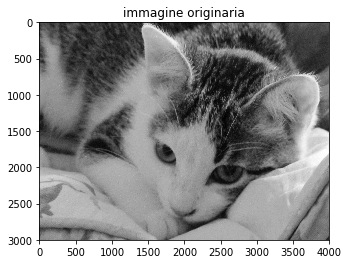

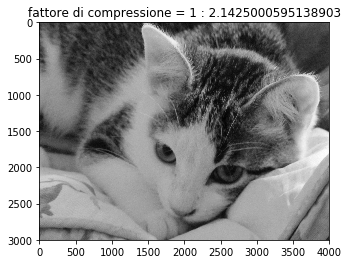

fattore di compressione = 1 :  2.1425000595138903


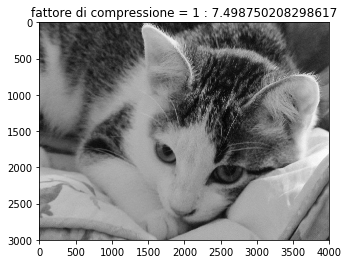

fattore di compressione = 1 :  7.498750208298617


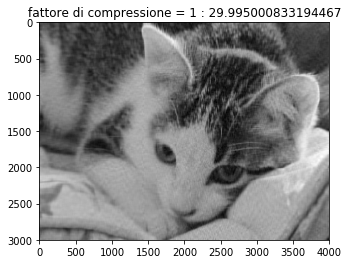

fattore di compressione = 1 :  29.995000833194467


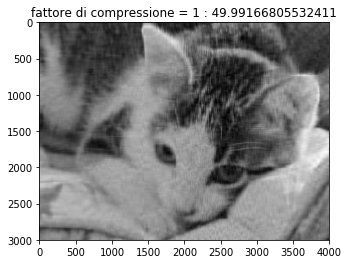

fattore di compressione = 1 :  49.99166805532411


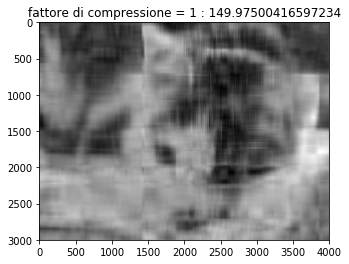

fattore di compressione = 1 :  149.97500416597234


In [40]:
# Vediamo ora la decomposizione diadica in cui teniamo solo un 
# sottoinsieme di termini (o equivalentemente "SVD-troncata") 
# di un'immagine:
import PIL.Image as Image

im = Image.open("IMG_1599.JPG")
im = im.convert("L")
print(im.format, im.size, im.mode)
#im.save("prova.png","L")
X = np.reshape(np.matrix(im.getdata()), (im.size[1],im.size[0]))
#X = X[100:800,160:1060]
print("X.shape =", X.shape)
plt.figure(1); plt.imshow(X,'gray'); plt.title('immagine originaria'); 
plt.show()

[U,S,V]=np.linalg.svd(X,full_matrices=0); V = V.T
S = np.diag(S)
i = 0
for k in [700, 200, 50, 30, 10]:
  i = i+1
  m = U.shape[0]; n = V.shape[1]
  plt.figure(i); plt.imshow(U[:,0:k]@S[0:k,0:k]@V[:,0:k].T,'gray')
  plt.title('fattore di compressione = 1 : ' + str(float(m*n)/float(m*k+k+k*n))); plt.show()
  print('fattore di compressione = 1 : ', float(m*n)/float(m*k+k+k*n))
#endfor

print('''
==> si può notare che, anche con fattori di compressione molto elevati, si
    riconosce ancora il soggetto della foto.
''')